In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime

In [2]:
area_pre_feature_selection = pd.read_csv('../../data/pre_training/area_pre_feature_selection.csv')
district_pre_feature_selection = pd.read_csv('../../data/pre_training/district_pre_feature_selection.csv')

In [3]:
area_features = area_pre_feature_selection.drop('area_crimes_this_hour', axis=1)
district_features = district_pre_feature_selection.drop('district_crimes_this_hour', axis=1)

area_target = area_pre_feature_selection[['year', 'area_crimes_this_hour']]
district_target = district_pre_feature_selection[['year', 'district_crimes_this_hour']]

In [4]:
# break the area dataset into testing and training datasets
area_feature_training_data = area_features[area_features['year'] < 2020].reset_index(drop=True)
area_feature_testing_data = area_features[area_features['year'] == 2020].reset_index(drop=True)

area_target_training_data = area_target[area_target['year'] < 2020].reset_index(drop=True)
area_target_testing_data = area_target[area_target['year'] == 2020].reset_index(drop=True)

In [5]:
# break the district dataset into testing and training datasets
district_feature_training_data = district_features[district_features['year'] < 2020].reset_index(drop=True)
district_feature_testing_data = district_features[district_features['year'] == 2020].reset_index(drop=True)

district_target_training_data = district_target[district_target['year'] < 2020].reset_index(drop=True)
district_target_testing_data = district_target[district_target['year'] == 2020].reset_index(drop=True)

In [6]:
area_target_training_data = area_target_training_data.drop('year', axis=1)
area_target_testing_data = area_target_testing_data.drop('year', axis=1)
district_target_training_data = district_target_training_data.drop('year', axis=1)
district_target_testing_data = district_target_testing_data.drop('year', axis=1)

In [7]:
# LR - SKLearn
# XGBoost - XGBoost
# RF - SKLearn
# ARIMA - Statsmodels
# VAR - Statsmodels
# LSTM - Tensorflow

In [8]:
# code to run while gone this weekend (do everything for area and district):
# SFS for lin reg
# training and testing of lin reg

# training and testing of xgboost
# parameter tuning of xgboost
# training and testing of new xgboost

# training and testing of rf
# parameter tuning of rf
# training and testing of new rf

##### Linear Regression

In [9]:
lr_area_feature_training_data = area_feature_training_data.drop('date_hour', axis=1)
lr_area_feature_testing_data = area_feature_testing_data.drop('date_hour', axis=1)

lr_district_feature_training_data = district_feature_training_data.drop('date_hour', axis=1)
lr_district_feature_testing_data = district_feature_testing_data.drop('date_hour', axis=1)

In [10]:
# target encoding of district/area columns
area_means = area_pre_feature_selection.groupby('area_id')['area_crimes_this_hour'].mean()
district_means = district_pre_feature_selection.groupby('district')['district_crimes_this_hour'].mean()

lr_area_feature_training_data['area_id_target_encoded'] = lr_area_feature_training_data['area_id'].map(area_means)
lr_area_feature_testing_data['area_id_target_encoded'] = lr_area_feature_testing_data['area_id'].map(area_means)

lr_district_feature_training_data['district_target_encoded'] = lr_district_feature_training_data['district'].map(district_means)
lr_district_feature_testing_data['district_target_encoded'] = lr_district_feature_testing_data['district'].map(district_means)

In [11]:
# frequency encoding of district/area columns
area_freq = area_pre_feature_selection['area_id'].value_counts() / len(area_pre_feature_selection)
district_freq = district_pre_feature_selection['district'].value_counts() / len(district_pre_feature_selection)

lr_area_feature_training_data['area_id_freq_encoded'] = lr_area_feature_training_data['area_id'].map(area_freq)
lr_area_feature_testing_data['area_id_freq_encoded'] = lr_area_feature_testing_data['area_id'].map(area_freq)

lr_district_feature_training_data['district_freq_encoded'] = lr_district_feature_training_data['district'].map(district_freq)
lr_district_feature_testing_data['district_freq_encoded'] = lr_district_feature_testing_data['district'].map(district_freq)

In [12]:
lr_area_feature_training_data.drop('area_id', axis=1, inplace=True)
lr_area_feature_testing_data.drop('area_id', axis=1, inplace=True)

lr_district_feature_training_data.drop('district', axis=1, inplace=True)
lr_district_feature_testing_data.drop('district', axis=1, inplace=True)

In [13]:
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(lr_area_feature_training_data.corr(), dtype=bool))

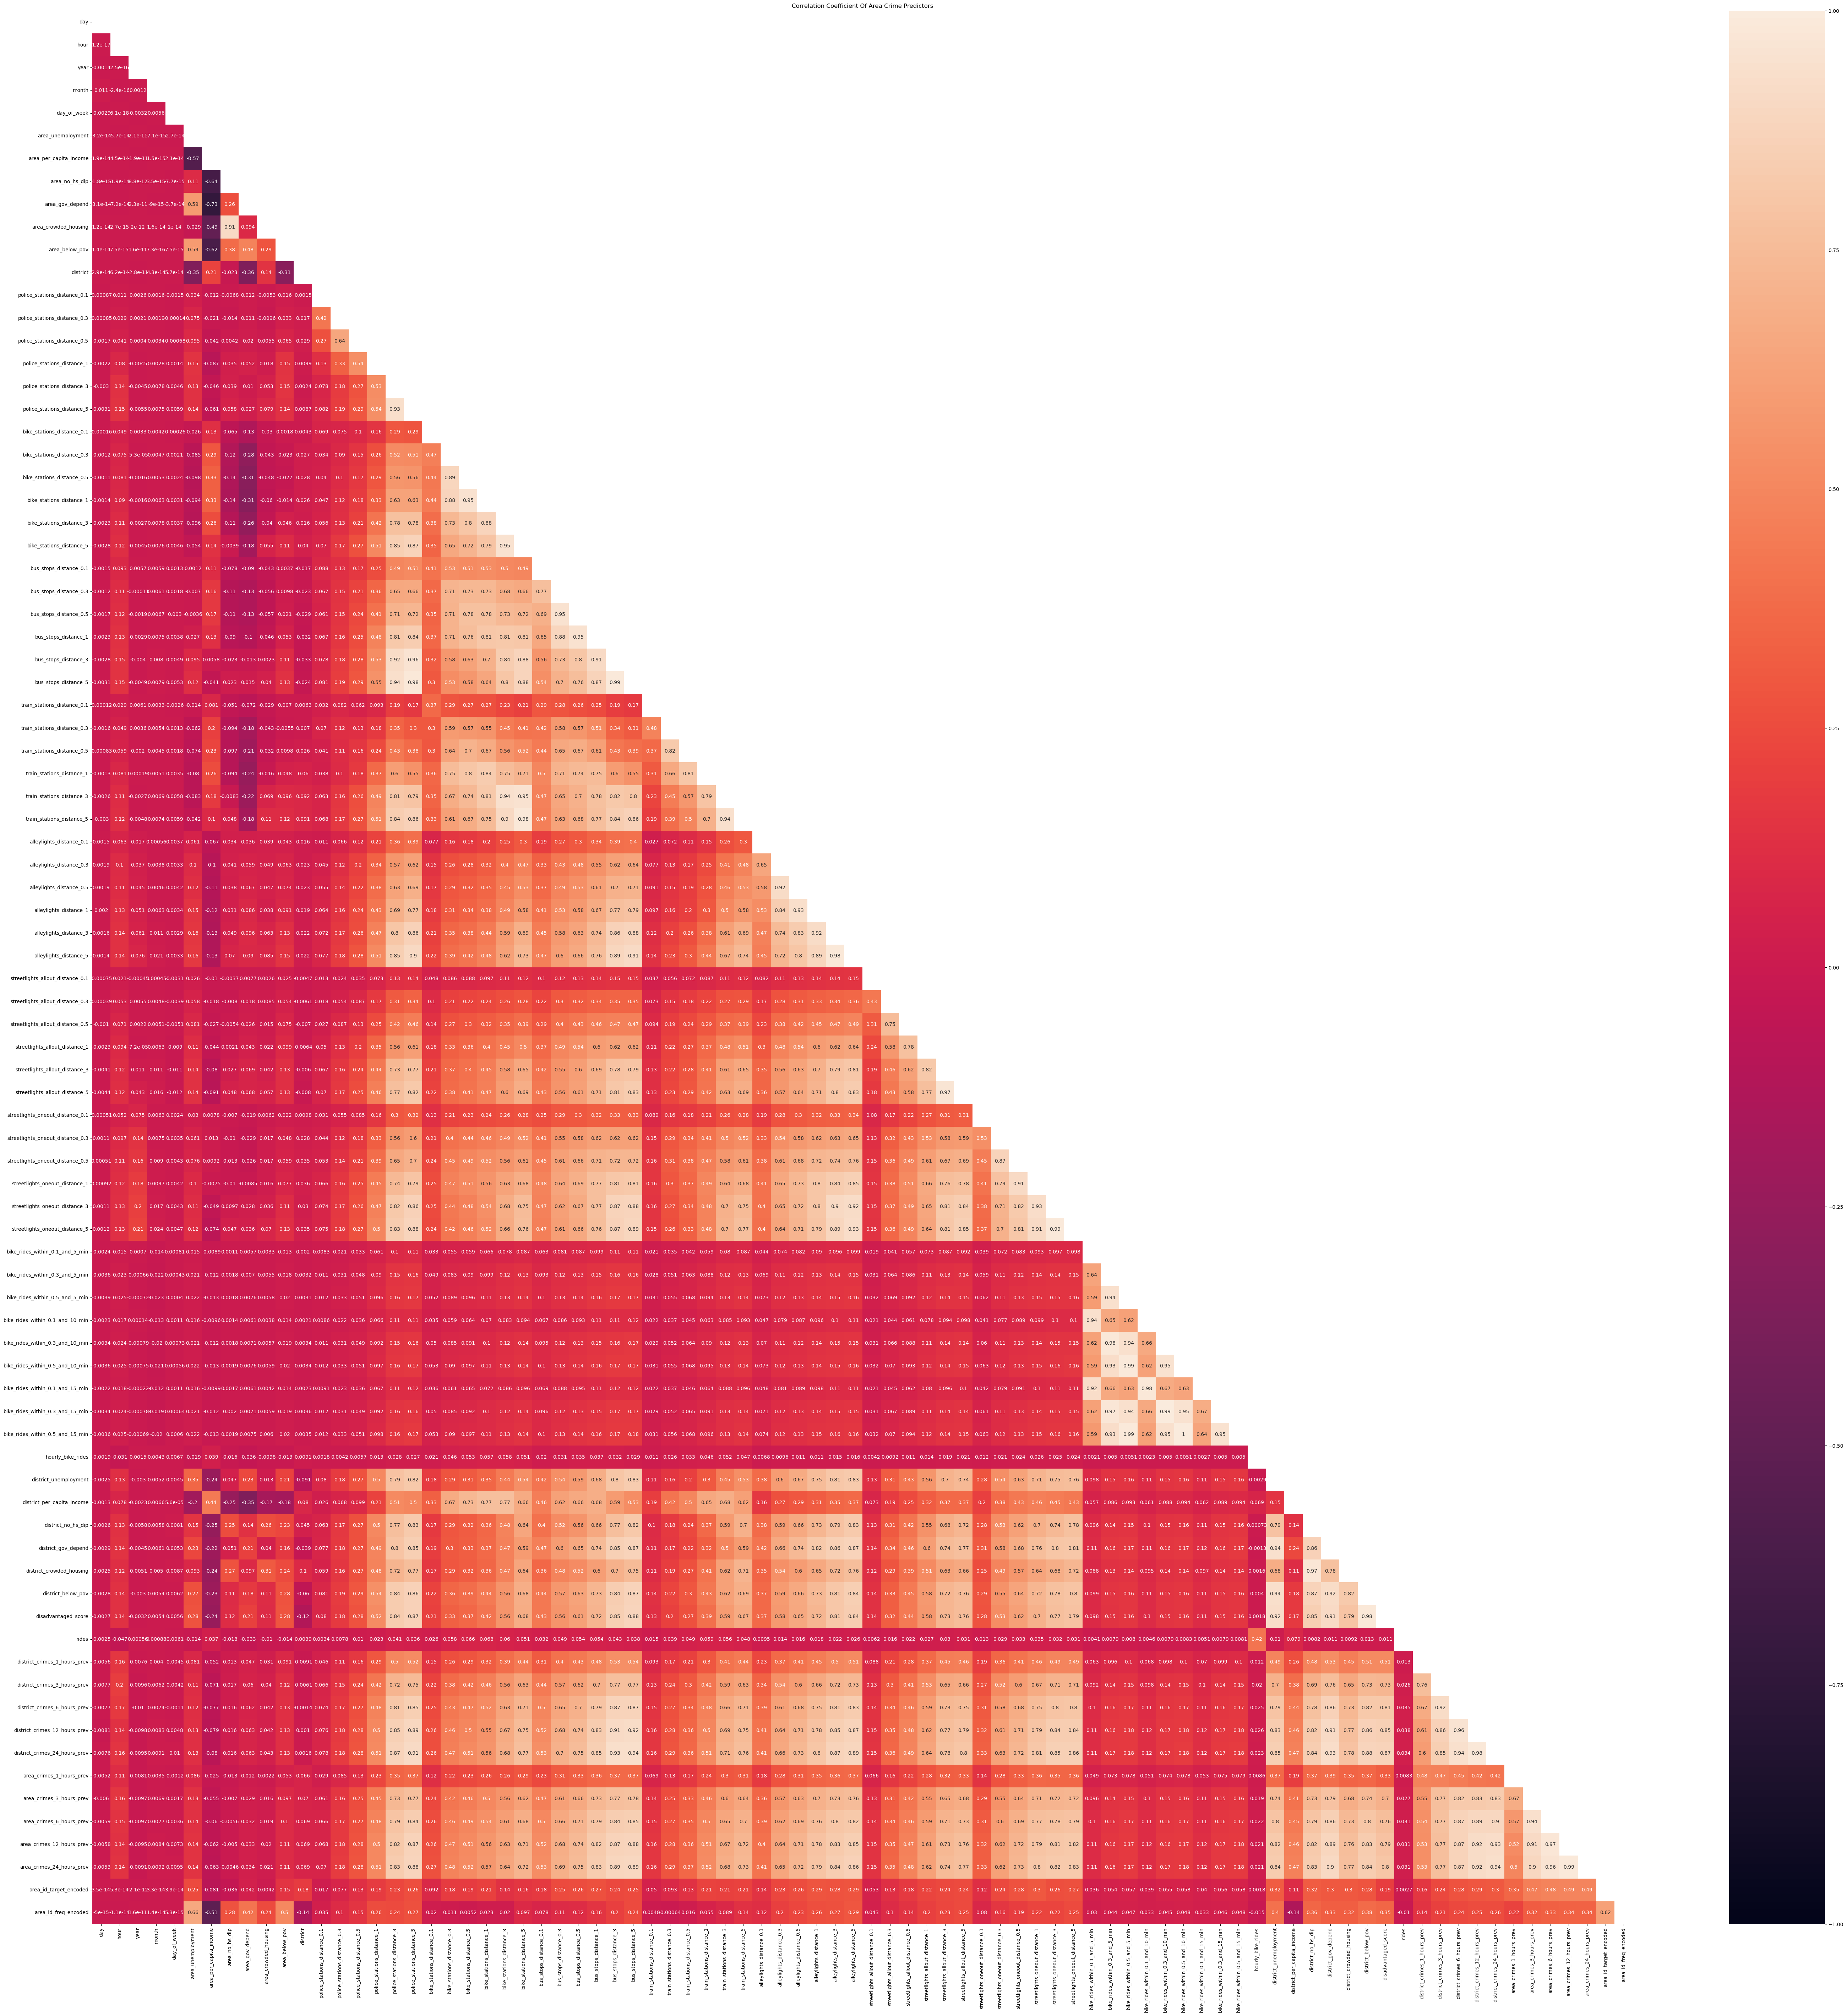

In [14]:
# generate heatmap
plt.figure(figsize=(70,70))
sns.heatmap(lr_area_feature_training_data.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Area Crime Predictors')
plt.show()

In [15]:
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(lr_district_feature_training_data.corr(), dtype=bool))

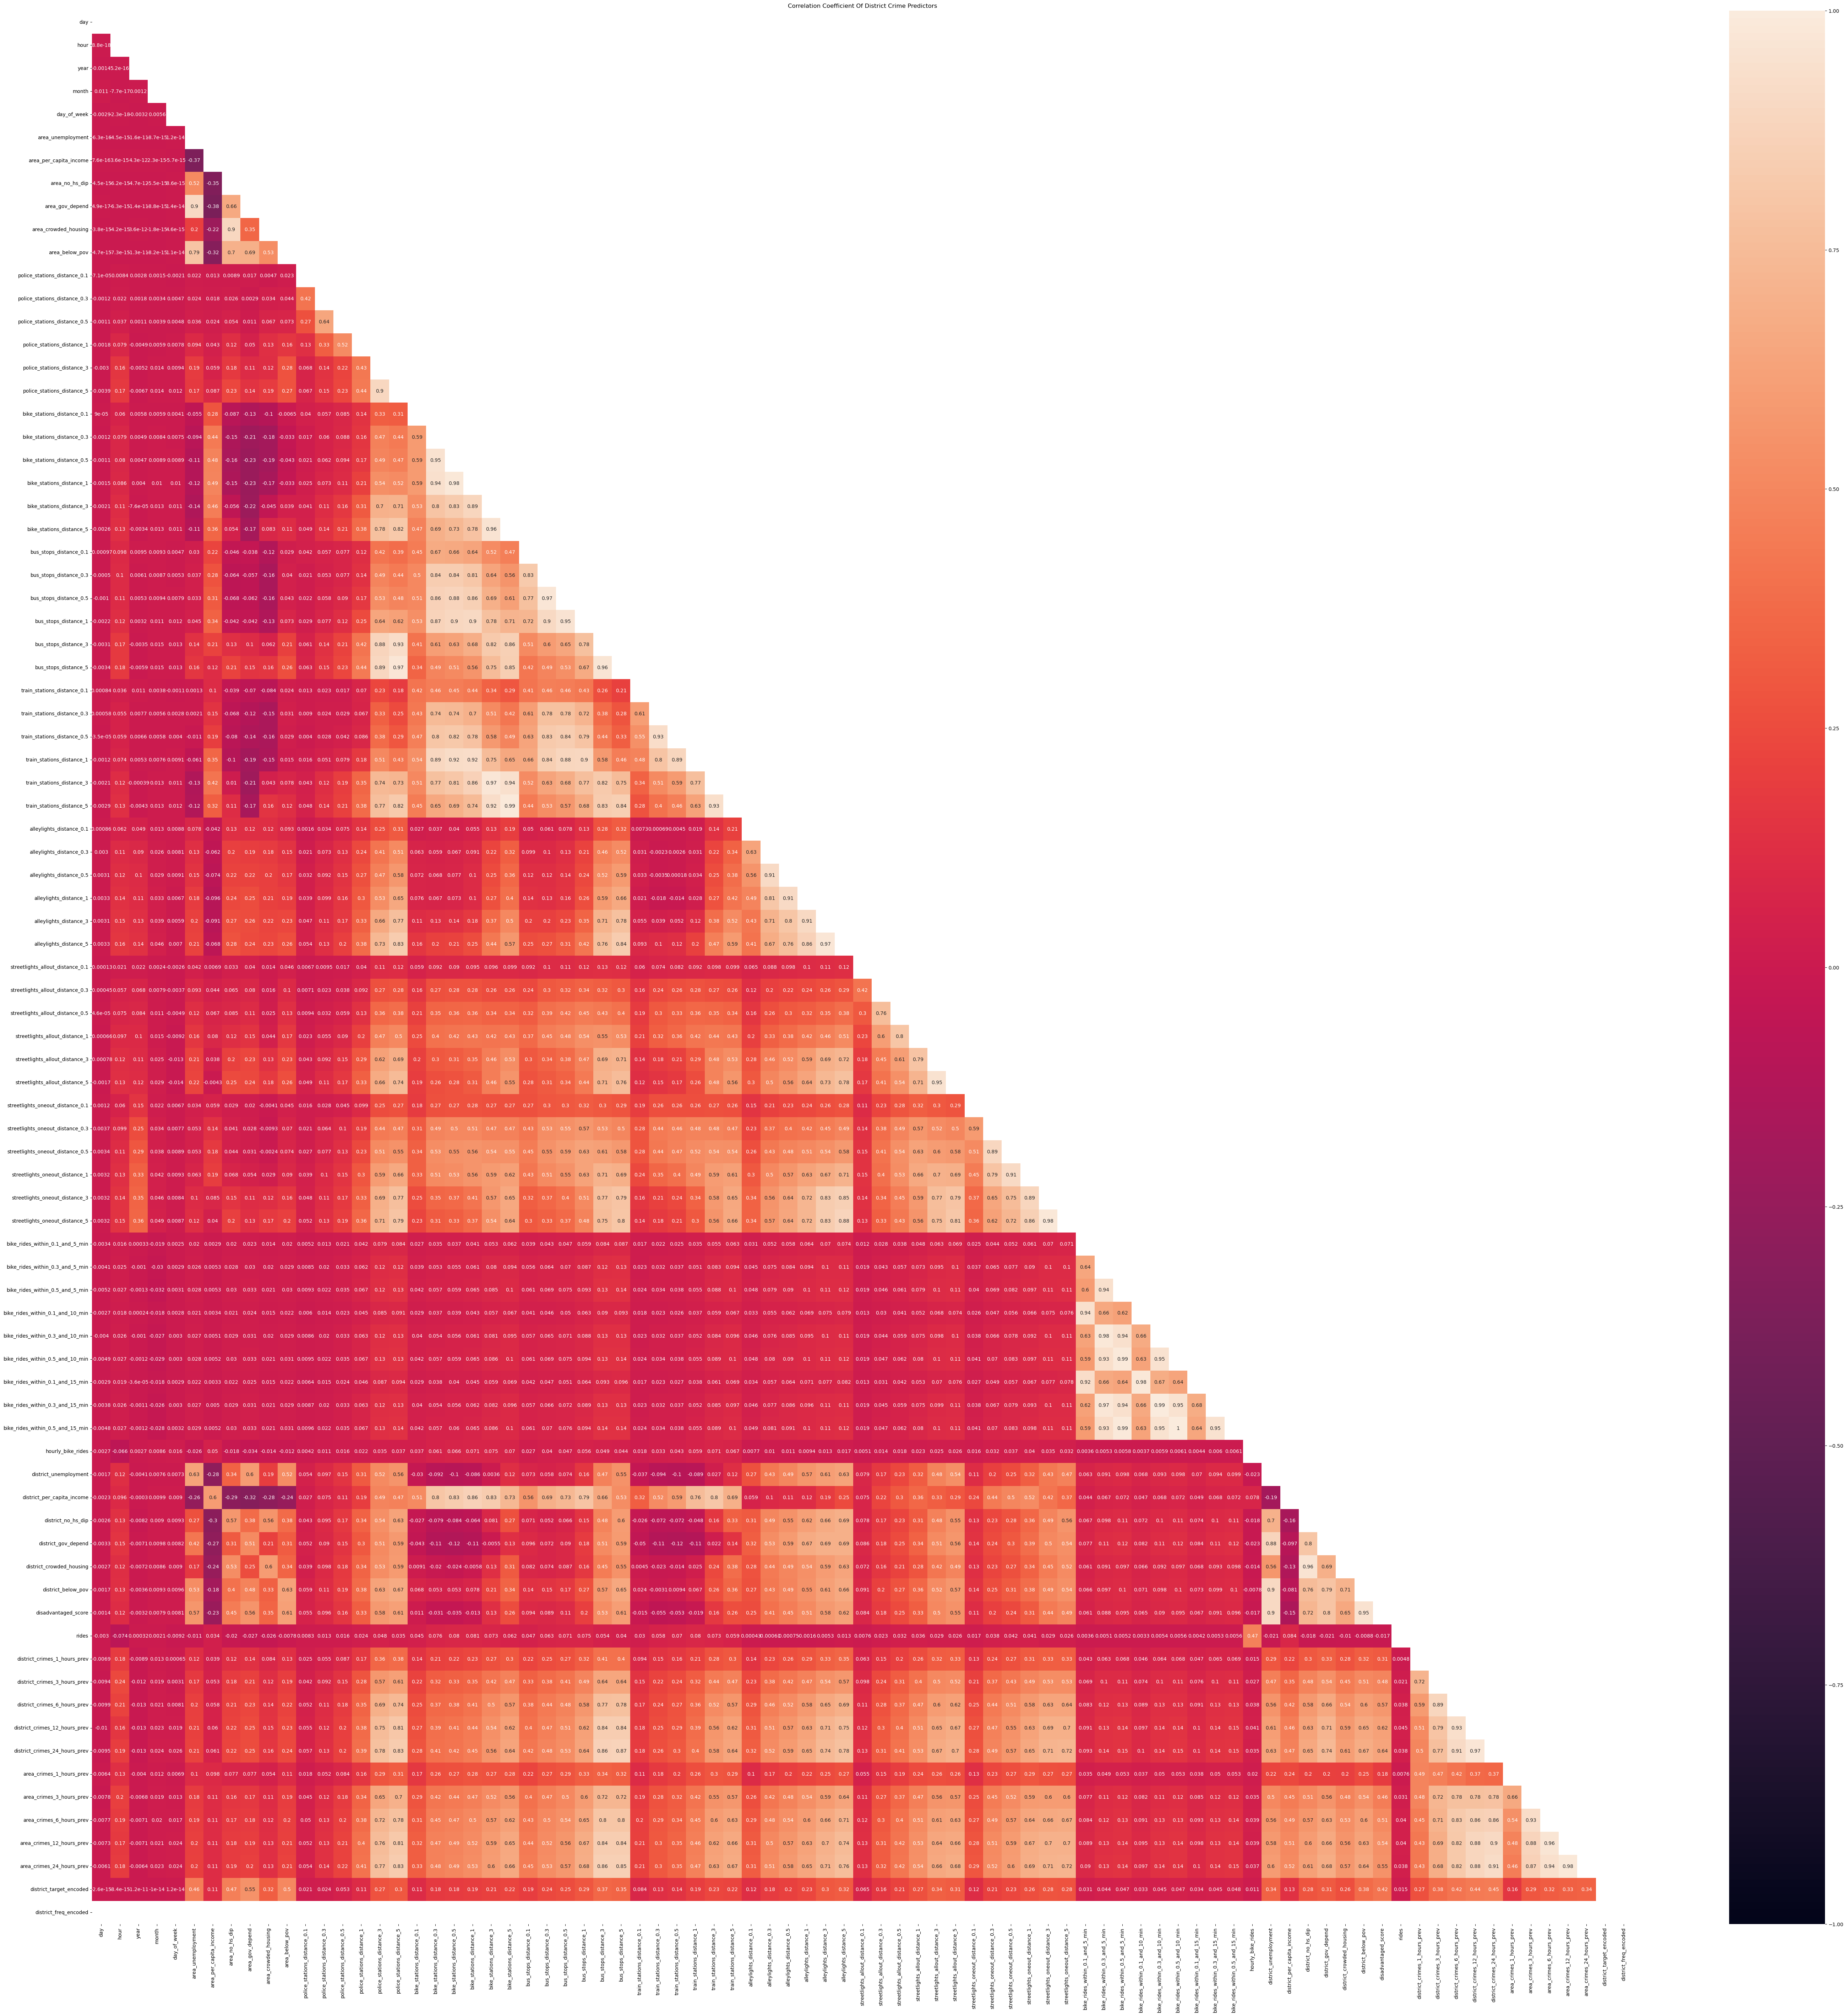

In [16]:
# generate heatmap
plt.figure(figsize=(70,70))
sns.heatmap(lr_district_feature_training_data.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of District Crime Predictors')
plt.show()

In [20]:
# Function to compute VIF for all features
def compute_vif(feature_df):
    print(f"{datetime.now()} - Starting VIF computation")
    X = feature_df.copy()
    # The calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # Create dataframe to store VIF values
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['feature'] != 'intercept']
    
    print(f"{datetime.now()} - Completed VIF computation")
    return vif

In [21]:
# Function to optimize VIF by dropping features with high VIF values
def optimize_vif(feature_df, vif_threshold):
    print(f"{datetime.now()} - Starting VIF optimization")
    feature_df = feature_df.copy()  # Work on a copy to avoid modifying the original DataFrame
    vif_df = compute_vif(feature_df)
    
    while (vif_df['vif'] >= vif_threshold).any():
        print(f"{datetime.now()} - Current VIF values:\n{vif_df}")
        largest_vif_feature = vif_df.loc[vif_df['vif'].idxmax(), 'feature']
        print(f"{datetime.now()} - Dropping feature: {largest_vif_feature} with VIF score of: {vif_df['vif'].max()}")
        feature_df.drop(largest_vif_feature, axis=1, inplace=True)
        vif_df = compute_vif(feature_df)
    
    print(f"{datetime.now()} - Completed VIF optimization")
    return vif_df

In [22]:
lr_area_selected_features = optimize_vif(lr_area_feature_training_data, 10)

2024-07-19 04:39:23.518052 - Starting VIF optimization


MemoryError: Unable to allocate 6.27 GiB for an array with shape (79, 10659456) and data type float64

In [ ]:
lr_district_selected_features = optimize_vif(lr_district_feature_training_data, 10)

In [ ]:
lr_area_selected_features_five = optimize_vif(lr_area_feature_training_data, 5)

In [ ]:
lr_district_selected_features_five = optimize_vif(lr_district_feature_training_data, 5)

##### XGBoost

##### Random Forest

##### ARIMA 

In [ ]:
# PCA


##### VAR

In [ ]:
# Granger Causality Tests


##### LSTM

In [ ]:
# Pearson's Correlation
